<a href="https://colab.research.google.com/github/RuchitShivani/SDG-Project/blob/main/Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Installing Required Libraries and Loading Datasets

In [35]:
import pandas as pd

file_path = "renewable_energy (2).csv"
df = pd.read_csv(file_path)

print(df.head())


  LOCATION  INDICATOR SUBJECT MEASURE FREQUENCY  TIME     Value Flag Codes
0      AUS  RENEWABLE     TOT    KTOE         A  1960  4436.932        NaN
1      AUS  RENEWABLE     TOT    KTOE         A  1961  4490.510        NaN
2      AUS  RENEWABLE     TOT    KTOE         A  1962  4407.097        NaN
3      AUS  RENEWABLE     TOT    KTOE         A  1963  4628.738        NaN
4      AUS  RENEWABLE     TOT    KTOE         A  1964  4497.396        NaN


#Drop Unnecessary Columns

In [36]:

df = df[['LOCATION', 'TIME', 'Value']]

print(df.head())


  LOCATION  TIME     Value
0      AUS  1960  4436.932
1      AUS  1961  4490.510
2      AUS  1962  4407.097
3      AUS  1963  4628.738
4      AUS  1964  4497.396


# Encode Categorical Data

In [37]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
df['LOCATION'] = le.fit_transform(df['LOCATION'])

print(df.head())


   LOCATION  TIME     Value
0         5  1960  4436.932
1         5  1961  4490.510
2         5  1962  4407.097
3         5  1963  4628.738
4         5  1964  4497.396


# Split Data into Training and Testing Sets

In [40]:
from sklearn.model_selection import train_test_split


X = df[['LOCATION', 'TIME']]
y = df['Value']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (12723, 2)
Testing set size: (3181, 2)


# Train Random Forest Regressor

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
y_train = imputer.fit_transform(y_train.values.reshape(-1, 1))
y_test = imputer.transform(y_test.values.reshape(-1, 1))
y_train = y_train.ravel()
y_test = y_test.ravel()

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_train_preds = rf_model.predict(X_train)
rf_test_preds = rf_model.predict(X_test)

# Train Linear Regression Model

In [43]:
from sklearn.linear_model import LinearRegression


lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

lr_train_preds = lr_model.predict(X_train)
lr_test_preds = lr_model.predict(X_test)


# Evaluate Model Performance

In [44]:
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_model(y_true_train, y_pred_train, y_true_test, y_pred_test, model_name):
    train_mse = mean_squared_error(y_true_train, y_pred_train)
    train_r2 = r2_score(y_true_train, y_pred_train)
    test_mse = mean_squared_error(y_true_test, y_pred_test)
    test_r2 = r2_score(y_true_test, y_pred_test)

    print(f"\n{model_name} Performance:")
    print(f"Train MSE: {train_mse:.2f}, Train R²: {train_r2:.2f}")
    print(f"Test MSE: {test_mse:.2f}, Test R²: {test_r2:.2f}")


evaluate_model(y_train, rf_train_preds, y_test, rf_test_preds, "Random Forest")

evaluate_model(y_train, lr_train_preds, y_test, lr_test_preds, "Linear Regression")



Random Forest Performance:
Train MSE: 2770408574.24, Train R²: 0.55
Test MSE: 7269044088.81, Test R²: 0.01

Linear Regression Performance:
Train MSE: 6150831881.28, Train R²: 0.00
Test MSE: 7279200330.69, Test R²: 0.01


# Data Visualisation

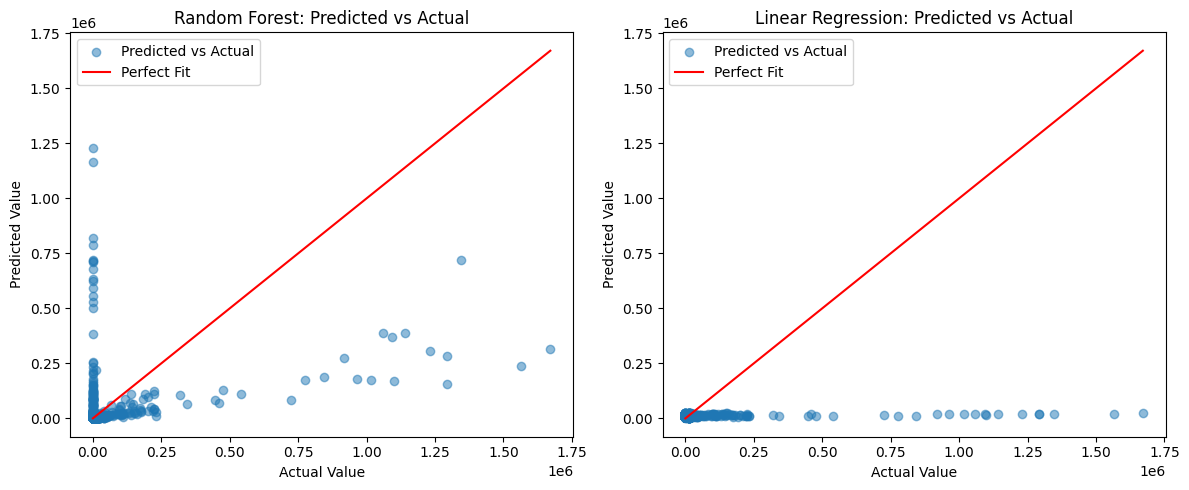

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, rf_test_preds, alpha=0.5, label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', label="Perfect Fit")
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Random Forest: Predicted vs Actual")
plt.legend()


plt.subplot(1, 2, 2)
plt.scatter(y_test, lr_test_preds, alpha=0.5, label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', label="Perfect Fit")
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Linear Regression: Predicted vs Actual")
plt.legend()

plt.tight_layout()
plt.show()
